In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-26 23:00:45--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.05s   

2023-09-26 23:00:45 (28.9 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('housing.csv')
len(df)

20640

In [38]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [40]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


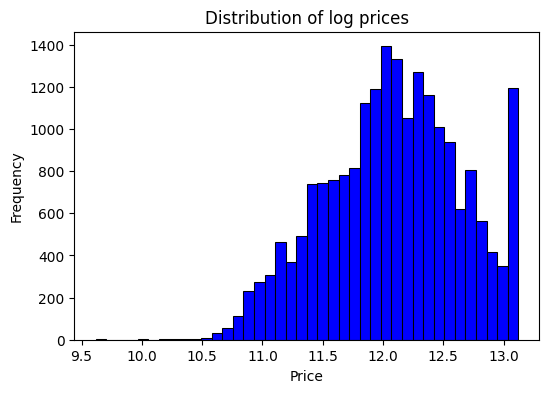

In [41]:
plt.figure(figsize=(6, 4))

sns.histplot(np.log1p(df.median_house_value), bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of log prices')

plt.show()

Median house value does have a long tail

In [42]:
bay_condition = pd.Series(['<1H OCEAN', 'INLAND']).str.lower().str.replace(' ', '_')

df = df[df['ocean_proximity'].isin(bay_condition)]

In [43]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1h_ocean
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1h_ocean
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1h_ocean
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1h_ocean
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1h_ocean


In [46]:
columns = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
]

df = df[columns]

In [47]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [48]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [50]:
np.median(df.population)

1195.0

In [57]:
df.reset_index(inplace=True, drop=True)

In [72]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [75]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [76]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [77]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [78]:
def prepare_X(df, type='zero'):
    df = df.copy()
    if type == 'zero':
      df = df.fillna(0)
    if type == 'mean':
      mean = df.total_bedrooms.mean()
      df = df.fillna(mean)

    X = df.values
    return X

In [85]:
print('Fill with zero:\n')

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
print('w_o, w:', w_0, w, '\n')

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
score_zero = rmse(y_val, y_pred)
print('validation', score_zero)

Fill with zero:

w_o, w: -9.763249477872478 [-2.68233309e-01 -2.55938802e-01  1.77710730e-03 -3.38393956e-05
  2.93766352e-04 -1.52190447e-04  3.96908643e-04  1.80600946e-01] 

train 0.34027197158295347
validation 0.3408479034165885


In [86]:
print('Fill with mean:\n')

X_train = prepare_X(df_train, type='mean')
w_0, w = train_linear_regression(X_train, y_train)
print('w_o, w:', w_0, w, '\n')

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val, type='mean')
y_pred = w_0 + X_val.dot(w)
score_mean = rmse(y_val, y_pred)
print('validation', score_mean)

Fill with mean:

w_o, w: -9.886133215408377 [-2.68652914e-01 -2.57026361e-01  1.79880767e-03 -3.87631029e-05
  3.78806885e-04 -1.49641599e-04  3.25344392e-04  1.81951358e-01] 

train 0.340030082226426
validation 0.3405701119713347


In [93]:
np.round(np.array([score_mean, score_zero, score_mean - score_zero]), 2)

array([ 0.34,  0.34, -0.  ])

In [94]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [96]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred), 2))

     0 0.34
 1e-06 0.34
0.0001 0.34
 0.001 0.34
  0.01 0.34
   0.1 0.34
     1 0.34
     5 0.35
    10 0.35


In [113]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = dict()

for seed in seed_values:
  np.random.seed(seed)

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_shuffled = df.iloc[idx]

  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  y_train_orig = df_train.median_house_value.values
  y_val_orig = df_val.median_house_value.values
  y_test_orig = df_test.median_house_value.values

  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  X_train = prepare_X(df_train)
  X_val = prepare_X(df_val)
  w_0, w = train_linear_regression(X_train, y_train)
  y_pred = w_0 + X_val.dot(w)
  score = rmse(y_val, y_pred)
  scores[seed] = score


In [114]:
scores

{0: 0.33773871600429795,
 1: 0.3377999353665367,
 2: 0.33842870067535874,
 3: 0.33200494683039145,
 4: 0.33944518625559017,
 5: 0.34338197052661196,
 6: 0.33853302117699696,
 7: 0.34687476972995035,
 8: 0.35127368659627567,
 9: 0.3341558266520752}

In [115]:
std = np.array(list(scores.values())).std()

In [116]:
round(std, 3)

0.005

In [119]:
np.random.seed(9)
r = 0.001

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_test['median_house_value']

X_train = prepare_X(df_train)
X_test = prepare_X(df_test)
w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
y_pred = w_0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score, 2)


0.33